### Importing libs

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the housing dataset

In [171]:
houses = pd.read_csv('datasets/Housing.csv')

In [172]:
houses.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
53,7350000,5150,3,2,4,yes,no,no,no,yes,2,no,semi-furnished
364,3703000,3120,3,1,2,no,no,yes,yes,no,0,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
462,3080000,2160,3,1,2,no,no,yes,no,no,0,no,semi-furnished
172,5250000,8400,3,1,2,yes,yes,yes,no,yes,2,yes,unfurnished


In [173]:
houses.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [174]:
houses_reduced = houses[['price', 'area']]

In [175]:
houses_reduced.sample(3)

,price,area
274,4340000,6450
247,4550000,8400
467,3010000,3240


In [176]:
X = houses_reduced['area'].to_numpy() 
y = houses_reduced['price'].to_numpy() 

### Ploting the Area x Price

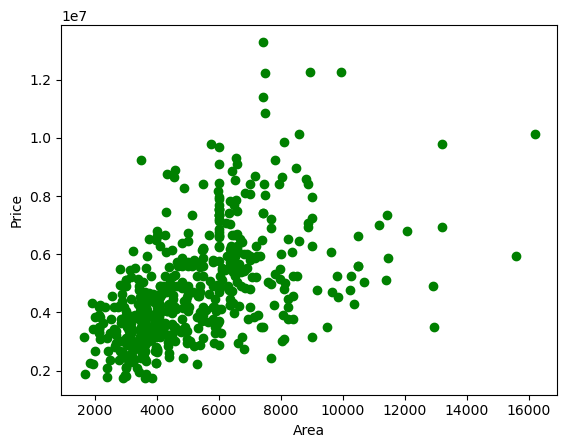

In [177]:
plt.scatter(X,y, color='g')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Split training and testing data
80% train, 20% test

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training the model

In [179]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train.reshape(-1,1), y_train)
print(model.coef_, model.intercept_)

[425.72984194] 2512254.2639593435


### Ploting the line of regression

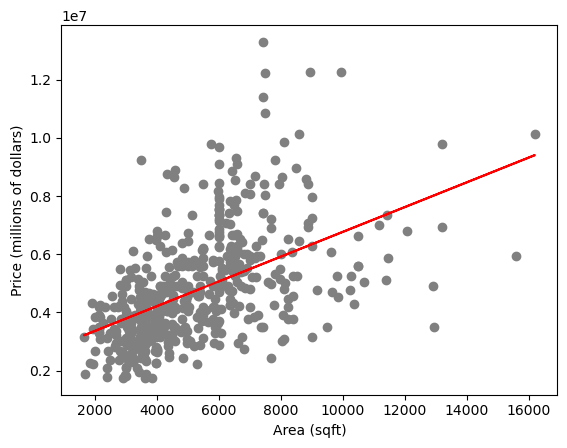

In [180]:
plt.scatter(X,y, color='grey')
plt.plot(X_train, model.intercept_ + model.coef_ * X_train, color='r')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (millions of dollars)')
plt.show()

### Predicting the house price for a given area

In [181]:
# Example: New data to predict
X_new = [[2500]]  # e.g., house area in sq.ft
y_pred = model.predict(X_new)
print(y_pred)

[3576578.8688063]


### Coeficient of determination
- The coefficient of determination, commonly known as R², measures how well a regression model explains the variation in the target variable.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [182]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_2 = model.predict(X_test.reshape(-1,1))
r2 = r2_score(y_test, y_pred_2)
print(f"R-squared (R2 ): {r2:.3f}")

R-squared (R2 ): 0.273


An R² of 0.273 means that the model can only explain 27.3% of the variability in house prices based on the area alone.

### Predicted versus true data

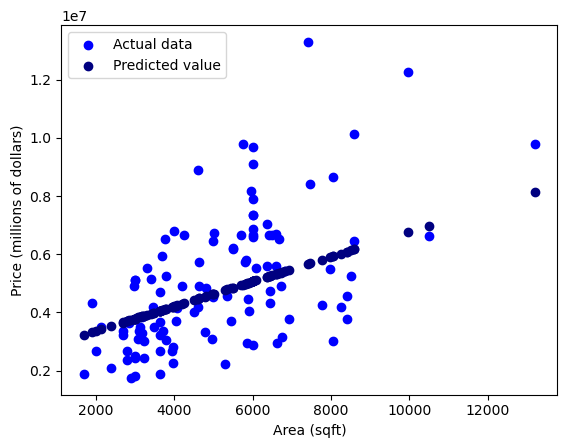

In [183]:
y_pred_3 = model.predict(X_test.reshape(-1,1))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred_3, label='Predicted value', color='navy')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (millions of dollars)')
plt.legend()
plt.show()

While the simple linear regression model using house area provides a starting point, it does not perform well on its own. To build a more accurate and useful prediction model, we need to incorporate more relevant features and possibly explore non-linear or ensemble models.